In [1]:
# Imports

import warnings

warnings.filterwarnings("ignore")

# Import libraries
import pandas as pd
import numpy as np
import datetime as dt
import calendar
from dateutil import relativedelta
import operator
import os
import random
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import warnings
import matplotlib.ticker as ticker
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: f'%.{len(str(x%1))-2}f' % x)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [2]:

df1 = pd.read_csv('nisare20demographicscorrect.csv',converters ={'CIF_ID':str})
df2 = pd.read_csv('nisare_trans.csv',converters ={'CIF_ID':str})
df3 = pd.read_csv('eod_nisare.csv',converters ={'CIF_ID':str})
df4 = pd.read_csv('FIRSTLASTPRODUCT_NISARE.csv',converters ={'CIF_ID':str})
df5 = pd.read_csv('NISARE_2.0_LOAN.csv',converters ={'CIF_ID':str})
df6 = pd.read_csv('nisareotg20final.csv',converters ={'CIF_ID':str})
df7 = pd.read_csv('nisarecards.csv',converters ={'CLIENT_NUMBER':str})

In [3]:
df6.sample()

,CIF_ID,NUM_TRX,AVG_TRAN_AMOUNT,MAX_AMOUNT_KES,MIN_AMOUNT_KES,AVG_REVENUE,TOTAL_REVENUE
2504,0421969,7,8271.428571428570649,20000.0,700.0,9.571428571428573,67


In [4]:
df1[df1.CIF_ID == '0421260']

,CIF_ID,CUST_NAME,MARITALSTATUS,CUSTOMERGENDER,CUSTOMERINCOME,SEGMENTNAME,CUSTOMERTYPE,DESC_NATIONALITY,ISRESIDENT,IS_DIASPORA_CUSTOMER,CUSTOMERSTATUS,POSTALCODE,ACCOUNTCURRENCY,COUNT_ACCOUNTS,AGE,YEARS_WITH_BANK,SEGMENTATION_CLASS,SOL_DESC,CUST_SECTOR_CODE,CUSTOMER_SECTOR,CUSTOMER_ID_AVAILABILITY,OLD_CUST_TAG
4484,0421260,KELVIN MUKIDI JUMA,MARRIED,M,0.0,PERSONAL BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,NaN,NaN,1,25,0,BL03,KISII,OAS,ANY OTHER ACTIVITIES,1,0


In [5]:
[df.sample(1) for df in [df1, df2, df3, df4, df5, df6]]


[       CIF_ID                CUST_NAME MARITALSTATUS CUSTOMERGENDER  \
 1158  0420750  DENNIS MATHENGE WAIRIMU       MARRIED              M   
 
       CUSTOMERINCOME       SEGMENTNAME CUSTOMERTYPE DESC_NATIONALITY  \
 1158             0.0  PERSONAL BANKING       RETAIL            KENYA   
 
      ISRESIDENT IS_DIASPORA_CUSTOMER CUSTOMERSTATUS POSTALCODE  \
 1158   RESIDENT                              ACTIVE        NaN   
 
      ACCOUNTCURRENCY  COUNT_ACCOUNTS  AGE  YEARS_WITH_BANK SEGMENTATION_CLASS  \
 1158             NaN               1   24                0               BL03   
 
      SOL_DESC CUST_SECTOR_CODE       CUSTOMER_SECTOR  \
 1158  ELDORET              OAS  ANY OTHER ACTIVITIES   
 
       CUSTOMER_ID_AVAILABILITY  OLD_CUST_TAG  
 1158                         1             0  ,
        CIF_ID  MEDIAN_MONTHLY_CREDIT_VALUE  MEDIAN_MONTHLY_CREDIT_VOLUME  \
 4929  0426889                      30193.0                           1.0   
 
       MEDIAN_MONTHLY_DEBIT_VALUE  

In [6]:
[df.shape for df in [df1, df2, df3, df4, df5, df6, df7]]

[(10354, 22),
 (10354, 6),
 (7295, 2),
 (10354, 3),
 (78, 34),
 (4340, 7),
 (5203, 2)]

In [7]:

df7 = df7.rename(columns = {'CLIENT_NUMBER':'CIF_ID' })

In [8]:
df7.sample(1)

,CIF_ID,CARD_CATEGORY_CODES
946,0419090,DEBIT


In [9]:
merged_df = df1

for df in [df2, df3, df4, df5, df6,df7]:
    merged_df = pd.merge(merged_df, df, on="CIF_ID", how="left")

In [10]:
merged_df.shape

(10563, 70)

In [11]:
merged_df.to_csv('combined.csv',index = False)

In [12]:
merged_df.sample(2)

,CIF_ID,CUST_NAME,MARITALSTATUS,CUSTOMERGENDER,CUSTOMERINCOME,SEGMENTNAME,CUSTOMERTYPE,DESC_NATIONALITY,ISRESIDENT,IS_DIASPORA_CUSTOMER,CUSTOMERSTATUS,POSTALCODE,ACCOUNTCURRENCY,COUNT_ACCOUNTS,AGE,YEARS_WITH_BANK,SEGMENTATION_CLASS,SOL_DESC,CUST_SECTOR_CODE,CUSTOMER_SECTOR,CUSTOMER_ID_AVAILABILITY,OLD_CUST_TAG,MEDIAN_MONTHLY_CREDIT_VALUE,MEDIAN_MONTHLY_CREDIT_VOLUME,MEDIAN_MONTHLY_DEBIT_VALUE,MEDIAN_MONTHLY_DEBIT_VOLUME,TOTAL_POINTS_EARNED,AVERAGE_MONTHLY_BALANCE,EARLIEST_PRODUCT,LATEST_PRODUCT,MAXDISBURSEDAMOUNT_ASSETFINANCE,MINDISBURSEDAMOUNT_ASSETFINANCE,AVGDISBURSEDAMOUNT_ASSETFINANCE,MAXDISBURSEDAMOUNT_HIREPURCHASE,MINDISBURSEDAMOUNT_HIREPURCHASE,AVGDISBURSEDAMOUNT_HIREPURCHASE,MAXDISBURSEDAMOUNT_BONDLEVERAGE,MINDISBURSEDAMOUNT_BONDLEVERAGE,AVGDISBURSEDAMOUNT_BONDLEVERAGE,MAXDISBURSEDAMOUNT_TERMLOAN,MINDISBURSEDAMOUNT_TERMLOAN,AVGDISBURSEDAMOUNT_TERMLOAN,MAXDISBURSEDAMOUNT_STAFFLOANS,MINDISBURSEDAMOUNT_STAFFLOANS,AVGDISBURSEDAMOUNT_STAFFLOANS,MAXDISBURSEDAMOUNT_IPF,MINDISBURSEDAMOUNT_IPF,AVGDISBURSEDAMOUNT_IPF,MAXDISBURSEDAMOUNT_HOUSING,MINDISBURSEDAMOUNT_HOUSING,AVGDISBURSEDAMOUNT_HOUSING,MAXDISBURSEDAMOUNT_PERSONALLOANS,MINDISBURSEDAMOUNT_PERSONALLOANS,AVGDISBURSEDAMOUNT_PERSONALLOANS,MAXDISBURSEDAMOUNT_SHORTTERMLOANS,MINDISBURSEDAMOUNT_SHORTTERMLOANS,AVGDISBURSEDAMOUNT_SHORTTERMLOANS,MAXDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MINDISBURSEDAMOUNT_CONSTRUCTIONLOAN,AVGDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MAXDISBURSEDAMOUNT_STOCKFINANCELOAN,MINDISBURSEDAMOUNT_STOCKFINANCELOAN,AVGDISBURSEDAMOUNT_STOCKFINANCELOAN,NUM_TRX,AVG_TRAN_AMOUNT,MAX_AMOUNT_KES,MIN_AMOUNT_KES,AVG_REVENUE,TOTAL_REVENUE,CARD_CATEGORY_CODES
8714,0424691,ALEX MURERI NJOGU,MARRIED,M,0.0,PERSONAL BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,NaN,NaN,1,26,0,BL03,2ND NGONG AVENUE,OAS,ANY OTHER ACTIVITIES,1,0,26971.0,1.0,26700.0,4.0,NaN,26271.0,PAYGO-LCY,PAYGO-LCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26000.0,26000.0,26000.0,13.0,13.0,DEBIT
7172,0427328,CHEBON KIMOSOP,OTHER,M,0.0,PERSONAL BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,NaN,NaN,1,35,0,BL03,ELDORET,OAS,ANY OTHER ACTIVITIES,1,0,300.0,1.0,NaN,NaN,NaN,300.0,PAYGO-LCY,PAYGO-LCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
merged_df.drop_duplicates(subset='CIF_ID', inplace=True)


In [14]:
merged_df.shape

(10354, 70)

In [75]:
merged_df[merged_df.MEDIAN_MONTHLY_CREDIT_VALUE == 182152276.8053432404994965]

,CIF_ID,CUST_NAME,MARITALSTATUS,CUSTOMERGENDER,CUSTOMERINCOME,SEGMENTNAME,CUSTOMERTYPE,DESC_NATIONALITY,ISRESIDENT,IS_DIASPORA_CUSTOMER,CUSTOMERSTATUS,POSTALCODE,ACCOUNTCURRENCY,COUNT_ACCOUNTS,AGE,YEARS_WITH_BANK,SEGMENTATION_CLASS,SOL_DESC,CUST_SECTOR_CODE,CUSTOMER_SECTOR,CUSTOMER_ID_AVAILABILITY,OLD_CUST_TAG,MEDIAN_MONTHLY_CREDIT_VALUE,MEDIAN_MONTHLY_CREDIT_VOLUME,MEDIAN_MONTHLY_DEBIT_VALUE,MEDIAN_MONTHLY_DEBIT_VOLUME,TOTAL_POINTS_EARNED,AVERAGE_MONTHLY_BALANCE,EARLIEST_PRODUCT,LATEST_PRODUCT,MAXDISBURSEDAMOUNT_ASSETFINANCE,MINDISBURSEDAMOUNT_ASSETFINANCE,AVGDISBURSEDAMOUNT_ASSETFINANCE,MAXDISBURSEDAMOUNT_HIREPURCHASE,MINDISBURSEDAMOUNT_HIREPURCHASE,AVGDISBURSEDAMOUNT_HIREPURCHASE,MAXDISBURSEDAMOUNT_BONDLEVERAGE,MINDISBURSEDAMOUNT_BONDLEVERAGE,AVGDISBURSEDAMOUNT_BONDLEVERAGE,MAXDISBURSEDAMOUNT_TERMLOAN,MINDISBURSEDAMOUNT_TERMLOAN,AVGDISBURSEDAMOUNT_TERMLOAN,MAXDISBURSEDAMOUNT_STAFFLOANS,MINDISBURSEDAMOUNT_STAFFLOANS,AVGDISBURSEDAMOUNT_STAFFLOANS,MAXDISBURSEDAMOUNT_IPF,MINDISBURSEDAMOUNT_IPF,AVGDISBURSEDAMOUNT_IPF,MAXDISBURSEDAMOUNT_HOUSING,MINDISBURSEDAMOUNT_HOUSING,AVGDISBURSEDAMOUNT_HOUSING,MAXDISBURSEDAMOUNT_PERSONALLOANS,MINDISBURSEDAMOUNT_PERSONALLOANS,AVGDISBURSEDAMOUNT_PERSONALLOANS,MAXDISBURSEDAMOUNT_SHORTTERMLOANS,MINDISBURSEDAMOUNT_SHORTTERMLOANS,AVGDISBURSEDAMOUNT_SHORTTERMLOANS,MAXDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MINDISBURSEDAMOUNT_CONSTRUCTIONLOAN,AVGDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MAXDISBURSEDAMOUNT_STOCKFINANCELOAN,MINDISBURSEDAMOUNT_STOCKFINANCELOAN,AVGDISBURSEDAMOUNT_STOCKFINANCELOAN,NUM_TRX,AVG_TRAN_AMOUNT,MAX_AMOUNT_KES,MIN_AMOUNT_KES,AVG_REVENUE,TOTAL_REVENUE,CARD_CATEGORY_CODES
4159,0065607,LALITCHANDRA G DAVE&SHEETAL SUBODH PATEL,SINGLE,M,250000.0,PREMIUM BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,00502,KES,1,83,12,BL05,KAREN CONNECTION,OAS,ANY OTHER ACTIVITIES,1,1,182152276.8053432404994965,1.0,90009381.6714490056037903,3.5,112.0,68013646.5799999982118607,CLUB-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,992.8099999999999454,992.8099999999999454,992.8099999999999454,13.0,39.0,NaN


In [76]:
top_5_customers = merged_df.sort_values(by='MEDIAN_MONTHLY_CREDIT_VALUE', ascending=False).head(5)
top_5_customers


,CIF_ID,CUST_NAME,MARITALSTATUS,CUSTOMERGENDER,CUSTOMERINCOME,SEGMENTNAME,CUSTOMERTYPE,DESC_NATIONALITY,ISRESIDENT,IS_DIASPORA_CUSTOMER,CUSTOMERSTATUS,POSTALCODE,ACCOUNTCURRENCY,COUNT_ACCOUNTS,AGE,YEARS_WITH_BANK,SEGMENTATION_CLASS,SOL_DESC,CUST_SECTOR_CODE,CUSTOMER_SECTOR,CUSTOMER_ID_AVAILABILITY,OLD_CUST_TAG,MEDIAN_MONTHLY_CREDIT_VALUE,MEDIAN_MONTHLY_CREDIT_VOLUME,MEDIAN_MONTHLY_DEBIT_VALUE,MEDIAN_MONTHLY_DEBIT_VOLUME,TOTAL_POINTS_EARNED,AVERAGE_MONTHLY_BALANCE,EARLIEST_PRODUCT,LATEST_PRODUCT,MAXDISBURSEDAMOUNT_ASSETFINANCE,MINDISBURSEDAMOUNT_ASSETFINANCE,AVGDISBURSEDAMOUNT_ASSETFINANCE,MAXDISBURSEDAMOUNT_HIREPURCHASE,MINDISBURSEDAMOUNT_HIREPURCHASE,AVGDISBURSEDAMOUNT_HIREPURCHASE,MAXDISBURSEDAMOUNT_BONDLEVERAGE,MINDISBURSEDAMOUNT_BONDLEVERAGE,AVGDISBURSEDAMOUNT_BONDLEVERAGE,MAXDISBURSEDAMOUNT_TERMLOAN,MINDISBURSEDAMOUNT_TERMLOAN,AVGDISBURSEDAMOUNT_TERMLOAN,MAXDISBURSEDAMOUNT_STAFFLOANS,MINDISBURSEDAMOUNT_STAFFLOANS,AVGDISBURSEDAMOUNT_STAFFLOANS,MAXDISBURSEDAMOUNT_IPF,MINDISBURSEDAMOUNT_IPF,AVGDISBURSEDAMOUNT_IPF,MAXDISBURSEDAMOUNT_HOUSING,MINDISBURSEDAMOUNT_HOUSING,AVGDISBURSEDAMOUNT_HOUSING,MAXDISBURSEDAMOUNT_PERSONALLOANS,MINDISBURSEDAMOUNT_PERSONALLOANS,AVGDISBURSEDAMOUNT_PERSONALLOANS,MAXDISBURSEDAMOUNT_SHORTTERMLOANS,MINDISBURSEDAMOUNT_SHORTTERMLOANS,AVGDISBURSEDAMOUNT_SHORTTERMLOANS,MAXDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MINDISBURSEDAMOUNT_CONSTRUCTIONLOAN,AVGDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MAXDISBURSEDAMOUNT_STOCKFINANCELOAN,MINDISBURSEDAMOUNT_STOCKFINANCELOAN,AVGDISBURSEDAMOUNT_STOCKFINANCELOAN,NUM_TRX,AVG_TRAN_AMOUNT,MAX_AMOUNT_KES,MIN_AMOUNT_KES,AVG_REVENUE,TOTAL_REVENUE,CARD_CATEGORY_CODES
4159,0065607,LALITCHANDRA G DAVE&SHEETAL SUBODH PATEL,SINGLE,M,250000.0,PREMIUM BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,00502,KES,1,83,12,BL05,KAREN CONNECTION,OAS,ANY OTHER ACTIVITIES,1,1,182152276.8053432404994965,1.0,90009381.6714490056037903,3.5,112.0,68013646.5799999982118607,CLUB-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,992.8099999999999454,992.8099999999999454,992.8099999999999454,13.0,39.0,NaN
8460,0420345,MINAL BHANDARI,MARRIED,F,0.0,PREMIUM BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,00100,NaN,1,46,0,BL05,KENYATTA AVENUE,OAS,ANY OTHER ACTIVITIES,1,0,90000000.0,1.0,90000000.0,1.0,NaN,0.0,PAYGO-LCY,FIXED DEPOSIT INT INFL GEN - LCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2824,0295920,ELIZABETH WANJIRU DAVE,SINGLE,F,1000000.0,PREMIUM BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,00500,KES,2,64,3,BL05,PANARI CENTRE,OAS,ANY OTHER ACTIVITIES,1,0,87738512.0,4.0,600.0,2.0,NaN,87733212.0,PAYGO-LCY,PAYGO-LCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEBIT | DEBIT
9947,0003085,DIPAK KESARA VALJI,MARRIED,M,250000.0,PREMIUM BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,00100,KES,1,48,16,BL05,KENYATTA AVENUE,OAS,ANY OTHER ACTIVITIES,1,1,71575697.5,10.0,143240739.101500004529953,5.0,130.0,5569506.3399999998509884,PERSONAL SAPPHIRE - LCY,FIXED DEPOSIT INT INFL GEN - FCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3989,0047776,VINAY NILESH KERAI,SINGLE,M,1000000.0,PERSONAL BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,00500,KES,2,28,13,BL05,INDUSTRIAL AREA,OAS,ANY OTHER ACTIVITIES,1,1,68200000.0,2.0,33703549.9549999982118607,8.0,NaN,16415313.7699999995529652,YOUNG SAVERS - LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEBIT | DEBIT


In [15]:
merged_df.describe()

,CUSTOMERINCOME,COUNT_ACCOUNTS,AGE,YEARS_WITH_BANK,CUSTOMER_ID_AVAILABILITY,OLD_CUST_TAG,MEDIAN_MONTHLY_CREDIT_VALUE,MEDIAN_MONTHLY_CREDIT_VOLUME,MEDIAN_MONTHLY_DEBIT_VALUE,MEDIAN_MONTHLY_DEBIT_VOLUME,TOTAL_POINTS_EARNED,AVERAGE_MONTHLY_BALANCE,MAXDISBURSEDAMOUNT_ASSETFINANCE,MINDISBURSEDAMOUNT_ASSETFINANCE,AVGDISBURSEDAMOUNT_ASSETFINANCE,MAXDISBURSEDAMOUNT_HIREPURCHASE,MINDISBURSEDAMOUNT_HIREPURCHASE,AVGDISBURSEDAMOUNT_HIREPURCHASE,MAXDISBURSEDAMOUNT_BONDLEVERAGE,MINDISBURSEDAMOUNT_BONDLEVERAGE,AVGDISBURSEDAMOUNT_BONDLEVERAGE,MAXDISBURSEDAMOUNT_TERMLOAN,MINDISBURSEDAMOUNT_TERMLOAN,AVGDISBURSEDAMOUNT_TERMLOAN,MAXDISBURSEDAMOUNT_STAFFLOANS,MINDISBURSEDAMOUNT_STAFFLOANS,AVGDISBURSEDAMOUNT_STAFFLOANS,MAXDISBURSEDAMOUNT_IPF,MINDISBURSEDAMOUNT_IPF,AVGDISBURSEDAMOUNT_IPF,MAXDISBURSEDAMOUNT_HOUSING,MINDISBURSEDAMOUNT_HOUSING,AVGDISBURSEDAMOUNT_HOUSING,MAXDISBURSEDAMOUNT_PERSONALLOANS,MINDISBURSEDAMOUNT_PERSONALLOANS,AVGDISBURSEDAMOUNT_PERSONALLOANS,MAXDISBURSEDAMOUNT_SHORTTERMLOANS,MINDISBURSEDAMOUNT_SHORTTERMLOANS,AVGDISBURSEDAMOUNT_SHORTTERMLOANS,MAXDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MINDISBURSEDAMOUNT_CONSTRUCTIONLOAN,AVGDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MAXDISBURSEDAMOUNT_STOCKFINANCELOAN,MINDISBURSEDAMOUNT_STOCKFINANCELOAN,AVGDISBURSEDAMOUNT_STOCKFINANCELOAN,NUM_TRX,AVG_TRAN_AMOUNT,MAX_AMOUNT_KES,MIN_AMOUNT_KES,AVG_REVENUE,TOTAL_REVENUE
count,9685.0,10354.0,10354.0,10354.0,10354.0,10354.0,7258.0,7293.0,6257.0,6290.0,707.0,7274.0,0.0,0.0,0.0,7.0,7.0,7.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0,4.0,4.0,3.0,3.0,3.0,1.0,1.0,1.0,13.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,14.0,14.0,4340.0,4340.0,4340.0,4340.0,4340.0,4340.0
mean,58750.1290655653065187,1.06528877728414129,31.781630287811474,0.40757195286845666,0.9435000965810315,0.05369905350589144,271729.8598441879148595,5.6225147401617992,218108.5020450346928556,10.17201907790143167,420.19377652050917504,118622.6294954630720895,NaN,NaN,NaN,4408000.0,4408000.0,4408000.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,2064250.0,2064250.0,2064250.0,112367.3333333333284827,112367.3333333333284827,112367.3333333333284827,3704800.0,3704800.0,3704800.0,531722.38461538462433964,469391.6153846153756604,500557.0,NaN,NaN,NaN,NaN,NaN,NaN,185666.571428571420256,159894.42857142857974395,171973.5119047618936747,48.4755760368663573,7769.6804265185091936,29188.14336866357552935,2604.22169124423999165,10.22371635460804207,567.4062211981566861
std,409390.46395051904255524,0.25131063508966384,10.3564001589345356,1.8523715708468063,0.23089567631099775,0.22543374512822986,3222892.267193759791553,29.18303123386232656,2873344.7881634593941271,25.7388108702553602,1587.6273067789973084,1617304.5961376158520579,NaN,NaN,NaN,7870495.9130074307322502,7870495.9130074307322502,7870495.9130074307322502,NaN,NaN,NaN,NaN,NaN,NaN,674457.0038186274468898773,674457.0038186274468898773,674457.0038186274468898773,26062.889754080097191,26062.889754080097191,26062.889754080097191,NaN,NaN,NaN,567477.020016895839944482,531305.8428036120021716,538081.20004822069313377,NaN,NaN,NaN,NaN,NaN,NaN,176481.7074960611353163,171786.16423096129437909,173268.6284130475251004,316.5363956843237361,28766.4746214778024296,76753.45839164569042623,22038.4807034617115278,10.7741920704015914,6231.036534906451379356
min,0.0,1.0,18.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,-310256.1900000000023283,NaN,NaN,NaN,862500.0,862500.0,862500.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,1500000.0,1500000.0,1500000.0,82409.0,82409.0,82409.0,3704800.0,3704800.0,3704800.0,50000.0,50000.0,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,50000.0,44879.0,50000.0,1.0,1.3600000000000001,1.3600000000000001,0.65,3.0,3.0
25%,0.0,1.0,24.0,0.0,1.0,0.0,2000.0,1.0,1037.5,2.0,9.0,700.0,NaN,NaN,NaN,1248750.0,1248750.0,1248750.0,NaN,NaN,NaN,7000000.0,7000000.0,7000000.0,1500000.0,1500000.0,1500000.0,103638.0,103638.0,103638.0,3704800.0,3704800.0,3704800.0,100000.0,100000.0,100000.0,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,88066.0,88070.75,3.0,900.0,2000.0,150.0,5.48009923417107103,24.0
50%,0.0,1.0,29.0,0.0,1.0,0.0,14277.25,2.0,9803

In [16]:
master_df = merged_df.copy()

In [17]:
master_df['CIF_ID'] = master_df['CIF_ID'].astype(str)


In [18]:
master_df.columns.to_list()

['CIF_ID',
 'CUST_NAME',
 'MARITALSTATUS',
 'CUSTOMERGENDER',
 'CUSTOMERINCOME',
 'SEGMENTNAME',
 'CUSTOMERTYPE',
 'DESC_NATIONALITY',
 'ISRESIDENT',
 'IS_DIASPORA_CUSTOMER',
 'CUSTOMERSTATUS',
 'POSTALCODE',
 'ACCOUNTCURRENCY',
 'COUNT_ACCOUNTS',
 'AGE',
 'YEARS_WITH_BANK',
 'SEGMENTATION_CLASS',
 'SOL_DESC',
 'CUST_SECTOR_CODE',
 'CUSTOMER_SECTOR',
 'CUSTOMER_ID_AVAILABILITY',
 'OLD_CUST_TAG',
 'MEDIAN_MONTHLY_CREDIT_VALUE',
 'MEDIAN_MONTHLY_CREDIT_VOLUME',
 'MEDIAN_MONTHLY_DEBIT_VALUE',
 'MEDIAN_MONTHLY_DEBIT_VOLUME',
 'TOTAL_POINTS_EARNED',
 'AVERAGE_MONTHLY_BALANCE',
 'EARLIEST_PRODUCT',
 'LATEST_PRODUCT',
 'MAXDISBURSEDAMOUNT_ASSETFINANCE',
 'MINDISBURSEDAMOUNT_ASSETFINANCE',
 'AVGDISBURSEDAMOUNT_ASSETFINANCE',
 'MAXDISBURSEDAMOUNT_HIREPURCHASE',
 'MINDISBURSEDAMOUNT_HIREPURCHASE',
 'AVGDISBURSEDAMOUNT_HIREPURCHASE',
 'MAXDISBURSEDAMOUNT_BONDLEVERAGE',
 'MINDISBURSEDAMOUNT_BONDLEVERAGE',
 'AVGDISBURSEDAMOUNT_BONDLEVERAGE',
 'MAXDISBURSEDAMOUNT_TERMLOAN',
 'MINDISBURSEDAMOUNT_TERM

In [19]:
master_df['CARD_CATEGORIES'] = master_df['CARD_CATEGORY_CODES'].astype(str)
master_df['CARD_CATEGORIES'].fillna('No Cards',inplace=True)

In [20]:
master_df['CARD_CATEGORIES'].replace('nan', 'No Cards', inplace=True)

In [21]:
master_df['CARD_CATEGORIES'].value_counts(1)

No Cards                                                  0.5176743287618312
DEBIT                                                    0.42118987830790033
DEBIT | DEBIT                                           0.032451226579099865
PREPAID                                                 0.013038439250531195
PREPAID | PREPAID                                       0.003959822290902067
DEBIT | DEBIT | DEBIT                                   0.003670079196445818
DEBIT | DEBIT | DEBIT | DEBIT                          0.0024145257871354066
DEBIT | PREPAID                                        0.0019316206297083252
DEBIT | DEBIT | DEBIT | DEBIT | DEBIT                  0.0007726482518833301
PREPAID | PREPAID | PREPAID                            0.0006760672203979138
DEBIT | DEBIT | PREPAID | PREPAID                      0.0006760672203979138
CREDIT                                                 0.0004829051574270813
CREDIT | CREDIT                                        0.0002897430944562488

In [22]:
master_df['Credit_Card'] = [1 if 'Credit' in x else 0 for x in master_df['CARD_CATEGORIES']]
master_df['Debit_Card'] = [1 if 'Debit' in x else 0 for x in master_df['CARD_CATEGORIES']]
master_df['Prepaid_Card'] = [1 if 'Prepaid' in x else 0 for x in master_df['CARD_CATEGORIES']]

In [23]:
#for the modeling 
#creating a dummy category for cards
master_df['CARD_CATEGORIES'].unique()

array(['DEBIT', 'No Cards', 'DEBIT | DEBIT',
       'PREPAID | PREPAID | PREPAID | PREPAID | PREPAID', 'PREPAID',
       'PREPAID | PREPAID | PREPAID', 'DEBIT | PREPAID',
       'DEBIT | DEBIT | DEBIT | DEBIT', 'PREPAID | PREPAID',
       'DEBIT | DEBIT | DEBIT | DEBIT | DEBIT', 'DEBIT | DEBIT | DEBIT',
       'CREDIT | DEBIT', 'CREDIT', 'DEBIT | DEBIT | PREPAID | PREPAID',
       'DEBIT | DEBIT | DEBIT | DEBIT | PREPAID | PREPAID',
       'CREDIT | CREDIT', 'PREPAID | PREPAID | PREPAID | PREPAID',
       'DEBIT | DEBIT | DEBIT | PREPAID | PREPAID | PREPAID'],
      dtype=object)

In [24]:
categ_cols = ['CIF_ID','CUST_NAME','MARITALSTATUS','CUSTOMERGENDER','SEGMENTNAME','CUSTOMERTYPE',
       'DESC_NATIONALITY','CUSTOMERSTATUS','SEGMENTATION_CLASS',
       'SOL_DESC','EARLIEST_PRODUCT','LATEST_PRODUCT']

In [25]:
master_df[categ_cols] = master_df[categ_cols].fillna('UNAVAILABLE')

In [26]:
try:
    master_df.fillna(0,inplace=True)
except:
    pass

In [27]:
master_df.describe()

,CUSTOMERINCOME,COUNT_ACCOUNTS,AGE,YEARS_WITH_BANK,CUSTOMER_ID_AVAILABILITY,OLD_CUST_TAG,MEDIAN_MONTHLY_CREDIT_VALUE,MEDIAN_MONTHLY_CREDIT_VOLUME,MEDIAN_MONTHLY_DEBIT_VALUE,MEDIAN_MONTHLY_DEBIT_VOLUME,TOTAL_POINTS_EARNED,AVERAGE_MONTHLY_BALANCE,MAXDISBURSEDAMOUNT_ASSETFINANCE,MINDISBURSEDAMOUNT_ASSETFINANCE,AVGDISBURSEDAMOUNT_ASSETFINANCE,MAXDISBURSEDAMOUNT_HIREPURCHASE,MINDISBURSEDAMOUNT_HIREPURCHASE,AVGDISBURSEDAMOUNT_HIREPURCHASE,MAXDISBURSEDAMOUNT_BONDLEVERAGE,MINDISBURSEDAMOUNT_BONDLEVERAGE,AVGDISBURSEDAMOUNT_BONDLEVERAGE,MAXDISBURSEDAMOUNT_TERMLOAN,MINDISBURSEDAMOUNT_TERMLOAN,AVGDISBURSEDAMOUNT_TERMLOAN,MAXDISBURSEDAMOUNT_STAFFLOANS,MINDISBURSEDAMOUNT_STAFFLOANS,AVGDISBURSEDAMOUNT_STAFFLOANS,MAXDISBURSEDAMOUNT_IPF,MINDISBURSEDAMOUNT_IPF,AVGDISBURSEDAMOUNT_IPF,MAXDISBURSEDAMOUNT_HOUSING,MINDISBURSEDAMOUNT_HOUSING,AVGDISBURSEDAMOUNT_HOUSING,MAXDISBURSEDAMOUNT_PERSONALLOANS,MINDISBURSEDAMOUNT_PERSONALLOANS,AVGDISBURSEDAMOUNT_PERSONALLOANS,MAXDISBURSEDAMOUNT_SHORTTERMLOANS,MINDISBURSEDAMOUNT_SHORTTERMLOANS,AVGDISBURSEDAMOUNT_SHORTTERMLOANS,MAXDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MINDISBURSEDAMOUNT_CONSTRUCTIONLOAN,AVGDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MAXDISBURSEDAMOUNT_STOCKFINANCELOAN,MINDISBURSEDAMOUNT_STOCKFINANCELOAN,AVGDISBURSEDAMOUNT_STOCKFINANCELOAN,NUM_TRX,AVG_TRAN_AMOUNT,MAX_AMOUNT_KES,MIN_AMOUNT_KES,AVG_REVENUE,TOTAL_REVENUE,Credit_Card,Debit_Card,Prepaid_Card
count,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0,10354.0
mean,54954.12401004442654084,1.06528877728414129,31.781630287811474,0.40757195286845666,0.9435000965810315,0.05369905350589144,190478.5901824527536519,3.9603051960594939,131804.6066540257015731,6.17944755649990363,28.6920030905930084,83336.006079775776015595,0.0,0.0,0.0,2980.10430751400417648,2980.10430751400417648,2980.10430751400417648,0.0,0.0,0.0,676.06722039791384304,676.06722039791384304,676.06722039791384304,797.4695769750820773,797.4695769750820773,797.4695769750820773,32.5576588757967968,32.5576588757967968,32.5576588757967968,357.8134054471701688,357.8134054471701688,357.8134054471701688,667.6058528105080541,589.34624299787526525,628.47604790419165965,0.0,0.0,0.0,0.0,0.0,0.0,251.04616573305003158,216.19876376279700025,232.5313083510398542,20.31910372802781595,3256.7522745885967197,12234.5511126134751976,1091.5899304616573318,4.285390088757862,237.8349430171914207,0.0,0.0,0.0
std,396205.7626980711356737,0.25131063508966384,10.3564001589345356,1.8523715708468063,0.23089567631099775,0.22543374512822986,2701172.8681655963882804,24.6258306529109703,2236132.8838301892392337,20.6665457408844233,427.9230264487578097,1356634.23468919238075614,0.0,0.0,0.0,221423.2497284004057292,221423.2497284004057292,221423.2497284004057292,0.0,0.0,0.0,68792.9541652651969343,68792.9541652651969343,68792.9541652651969343,42160.5761210266136914,42160.5761210266136914,42160.5761210266136914,1946.5182391874855057,1946.5182391874855057,1946.5182391874855057,36409.1623702196229715,36409.1623702196229715,36409.1623702196229715,26978.318013306670764,24566.3734086058102548,25491.46390816511120647,0.0,0.0,0.0,0.0,0.0,0.0,9255.3409787573000358,8460.5638612363381981,8811.18038117450305435,206.31183657060952896,19013.494882259536098,51734.22167042335058795,14325.10593827493903518,8.6082300638231235,4043.5760330221733057,0.0,0.0,0.0
min,0.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-310256.1900000000023283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,1.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [28]:
master_df['CUSTOMERINCOME_CATEGORY'] = 'LOW'
master_df.loc[master_df['CUSTOMERINCOME'] <= 250000, 'CUSTOMERINCOME_CATEGORY'] = 'LOW'
master_df.loc[(master_df['CUSTOMERINCOME'] > 250000) & (master_df['CUSTOMERINCOME'] <= 1000000), 'CUSTOMERINCOME_CATEGORY'] = 'MEDIUM'
master_df.loc[master_df['CUSTOMERINCOME'] > 1000000, 'CUSTOMERINCOME_CATEGORY'] = 'HIGH'

In [29]:
def age_group(age):
    if age <= 17:  
        return "Minor"
    elif age <= 27: 
        return "Young Adult"
    elif age <= 34:  
        return "Adult"
    elif age <= 45: 
        return "Mid-aged"
    
    elif age <= 64:  
        return "Senior"
    else:  
        return "Elderly"

master_df['AGE_GROUP'] = master_df['AGE'].apply(lambda x: age_group(x))

In [30]:
def age_with_bank(age):
    if age <= 3:  
        return "Relatively New"
    elif age <= 7: 
        return "Retained Customers"
    elif age <= 10:  
        return "Sticky Customers"
    elif age > 10: 
        return "Loyalists"

master_df['YEARS_WITH_BANK_CATEGORY'] = master_df['YEARS_WITH_BANK'].apply(lambda x: age_with_bank(x))

In [31]:
def total_points(value):
    if value <= 0:
        return "No Card Usage"
    elif value <= 1000:  
        return "Low Card Usage"
    elif value <= 10000: 
        return "Medium Card Usage"
    elif value <= 50000:  
        return "High Card Usage"
    elif value > 50000: 
        return "Very High Card Usage"

master_df['TOTAL_POINTS_CATEGORY'] = master_df['TOTAL_POINTS_EARNED'].apply(lambda x: total_points(x))

In [32]:
master_df['has_taken_internal_loan'] = [1 if (a>0 or b>0 or c>0 or d>0 or e>0 or f>0 or g>0 or h>0 or i>0 or j>0
                                             or k>0)
                                       else 0 
                                     for a,b,c,d,e,f,g,h,i,j,k in zip(master_df['MAXDISBURSEDAMOUNT_ASSETFINANCE'],
                                                                   master_df['MAXDISBURSEDAMOUNT_STOCKFINANCELOAN'],
                                                                   master_df['MAXDISBURSEDAMOUNT_CONSTRUCTIONLOAN'],
                                                                   master_df['MAXDISBURSEDAMOUNT_PERSONALLOANS'],
                                                                   master_df['MAXDISBURSEDAMOUNT_HOUSING'],
                                                                   master_df['MAXDISBURSEDAMOUNT_IPF'],
                                                                   master_df['MAXDISBURSEDAMOUNT_SHORTTERMLOANS'],
                                                                   master_df['MAXDISBURSEDAMOUNT_TERMLOAN'],
                                                                   master_df['MAXDISBURSEDAMOUNT_STAFFLOANS'],
                                                                   master_df['MAXDISBURSEDAMOUNT_BONDLEVERAGE'],
                                                                   master_df['MAXDISBURSEDAMOUNT_HIREPURCHASE'])]

In [33]:
master_df.TOTAL_REVENUE.describe()

count                 10354.0
mean     237.8349430171914207
std     4043.5760330221733057
min                       0.0
25%                       0.0
50%                       0.0
75%                      48.0
max                  362898.0
Name: TOTAL_REVENUE, dtype: float64

In [34]:
master_df[master_df.TOTAL_REVENUE == 362898.0]

,CIF_ID,CUST_NAME,MARITALSTATUS,CUSTOMERGENDER,CUSTOMERINCOME,SEGMENTNAME,CUSTOMERTYPE,DESC_NATIONALITY,ISRESIDENT,IS_DIASPORA_CUSTOMER,CUSTOMERSTATUS,POSTALCODE,ACCOUNTCURRENCY,COUNT_ACCOUNTS,AGE,YEARS_WITH_BANK,SEGMENTATION_CLASS,SOL_DESC,CUST_SECTOR_CODE,CUSTOMER_SECTOR,CUSTOMER_ID_AVAILABILITY,OLD_CUST_TAG,MEDIAN_MONTHLY_CREDIT_VALUE,MEDIAN_MONTHLY_CREDIT_VOLUME,MEDIAN_MONTHLY_DEBIT_VALUE,MEDIAN_MONTHLY_DEBIT_VOLUME,TOTAL_POINTS_EARNED,AVERAGE_MONTHLY_BALANCE,EARLIEST_PRODUCT,LATEST_PRODUCT,MAXDISBURSEDAMOUNT_ASSETFINANCE,MINDISBURSEDAMOUNT_ASSETFINANCE,AVGDISBURSEDAMOUNT_ASSETFINANCE,MAXDISBURSEDAMOUNT_HIREPURCHASE,MINDISBURSEDAMOUNT_HIREPURCHASE,AVGDISBURSEDAMOUNT_HIREPURCHASE,MAXDISBURSEDAMOUNT_BONDLEVERAGE,MINDISBURSEDAMOUNT_BONDLEVERAGE,AVGDISBURSEDAMOUNT_BONDLEVERAGE,MAXDISBURSEDAMOUNT_TERMLOAN,MINDISBURSEDAMOUNT_TERMLOAN,AVGDISBURSEDAMOUNT_TERMLOAN,MAXDISBURSEDAMOUNT_STAFFLOANS,MINDISBURSEDAMOUNT_STAFFLOANS,AVGDISBURSEDAMOUNT_STAFFLOANS,MAXDISBURSEDAMOUNT_IPF,MINDISBURSEDAMOUNT_IPF,AVGDISBURSEDAMOUNT_IPF,MAXDISBURSEDAMOUNT_HOUSING,MINDISBURSEDAMOUNT_HOUSING,AVGDISBURSEDAMOUNT_HOUSING,MAXDISBURSEDAMOUNT_PERSONALLOANS,MINDISBURSEDAMOUNT_PERSONALLOANS,AVGDISBURSEDAMOUNT_PERSONALLOANS,MAXDISBURSEDAMOUNT_SHORTTERMLOANS,MINDISBURSEDAMOUNT_SHORTTERMLOANS,AVGDISBURSEDAMOUNT_SHORTTERMLOANS,MAXDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MINDISBURSEDAMOUNT_CONSTRUCTIONLOAN,AVGDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MAXDISBURSEDAMOUNT_STOCKFINANCELOAN,MINDISBURSEDAMOUNT_STOCKFINANCELOAN,AVGDISBURSEDAMOUNT_STOCKFINANCELOAN,NUM_TRX,AVG_TRAN_AMOUNT,MAX_AMOUNT_KES,MIN_AMOUNT_KES,AVG_REVENUE,TOTAL_REVENUE,CARD_CATEGORY_CODES,CARD_CATEGORIES,Credit_Card,Debit_Card,Prepaid_Card,CUSTOMERINCOME_CATEGORY,AGE_GROUP,YEARS_WITH_BANK_CATEGORY,TOTAL_POINTS_CATEGORY,has_taken_internal_loan
7656,0135691,JACKSON SENTEU KANAI,MARRIED,M,75000.0,PERSONAL BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,80200,KES,1,39,7,BL05,MALINDI,OAS,ANY OTHER ACTIVITIES,1,1,2300.0,1.0,72640.0,7.0,2.0,40081.6699999999982538,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY,PAYGO-LCY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15588.0,13611.9630484988447279,490000.0,400.0,23.28060046189376564,362898.0,0,No Cards,0,0,0,LOW,Mid-aged,Retained Customers,Low Card Usage,0


In [35]:
def otg_revenue(value):
    if value <= 5000:  
        return "Low Revenue Generator"
    elif value <= 50000: 
        return "Medium Revenue Generator"
    elif value <= 100000:  
        return "High Revenue Generator"
    elif value > 100000: 
        return "Very High Revenue Generator"

master_df['OTG_REVENUE_CATEGORY'] = master_df['TOTAL_REVENUE'].apply(lambda x: otg_revenue(x))

In [36]:
def otg_trans(value):
    if value == 0:  
        return "No OTG Transactions"
    elif value <= 50: 
        return "Low OTG Transactions"
    elif value <= 100:  
        return "Medium OTG Transactions"
    elif value > 100: 
        return "High OTG Transactions"

master_df['OTG_TRANS_CATEGORY'] = master_df['NUM_TRX'].apply(lambda x: otg_trans(x))

In [37]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x, data, y):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(data[x], data[y],margins=True).sort_values(by=1,ascending=False)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(data[x],data[y],normalize='index').sort_values(by=1,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.xlabel(f"{x} distribution in relation to {y}")
    plt.show()

In [38]:
## Helper Functions

def transformDate(df, datecol): 

    """
    function to transform the datefield into a datetime object, and generate associated date elements such as day,week,month,year etc.
    Args: Dataframe, datefield
    returns: Dataframe
    """
    df[datecol] = pd.to_datetime(df[datecol])
    df['Day'] = df[datecol].dt.day_name()
    df['Week'] = df[datecol].dt.week
    df['MonthName'] = df[datecol].dt.month_name()
    df['Year'] = df[datecol].dt.year

    return df

## Distribution plots for categorical variables
def univ_analysis(categ_cols, data):
    """
    Function to generate countplot of categorical variables.
    Args: categ_cols (a list of all the categorical fields), & the corresponding dataframe
    returns: countplots of all the categorical fields passed in.
    """
    for i in categ_cols:
        plt.figure(figsize=(12,6))
        if data[i].nunique()>10:
      # data[i].value_counts()[:10].plot(kind = 'bar')
            ax = (data[i].value_counts(ascending=False)[:10]/data[i].notnull().sum()*100).plot(kind='bar')
            ax.set_yticks(np.arange(0,110,10))
            ax2 = ax.twinx()
            ax2.set_yticks(np.arange(0,110,10)*data[i].notnull().sum()/100)

            for p in ax.patches:
                ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))

            plt.title(i+'_Distribution')
            plt.show()
            plt.savefig(i+'_Distribution.png')

        else:
            ncount = data[i].notnull().sum()
            ax = sns.countplot(x=i, data=data)
            plt.xticks(rotation=90)
            plt.title(i + '_Distribution')

            # Make twin axis
            ax2=ax.twinx()

            # Switch so count axis is on right, frequency on left
            ax2.yaxis.tick_left()
            ax.yaxis.tick_right()

            # Also switch the labels over
            ax.yaxis.set_label_position('right')
            ax2.yaxis.set_label_position('left')

            for p in ax.patches:
                x=p.get_bbox().get_points()[:,0]
                y=p.get_bbox().get_points()[1,1]
                ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                        ha='center', va='bottom') # set the alignment of the text

            # Use a LinearLocator to ensure the correct number of ticks
            ax.yaxis.set_major_locator(ticker.LinearLocator(11))

            # Fix the frequency range to 0-100
            ax2.set_ylim(0,100)
            ax.set_ylim(0,ncount)

            # And use a MultipleLocator to ensure a tick spacing of 10
            ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

            # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
            ax2.grid(None)
            plt.show()

            # fig = plt.figure()
            # return fig


## Continuous Variables Distribution Plots

def hist_plot(df, vals):
    """
      Function to generate density plot.
      Args: dataframe, & variable (continuous)
      returns: density plot.
    """
    # sns.set(style="whitegrid", palette='Blues_r')
    sns.histplot(df[vals])
    plt.title('Histogram of ' + vals)
    plt.show()

In [39]:
master_df['OLD_CUST_TAG'].value_counts()

0    9798
1     556
Name: OLD_CUST_TAG, dtype: int64

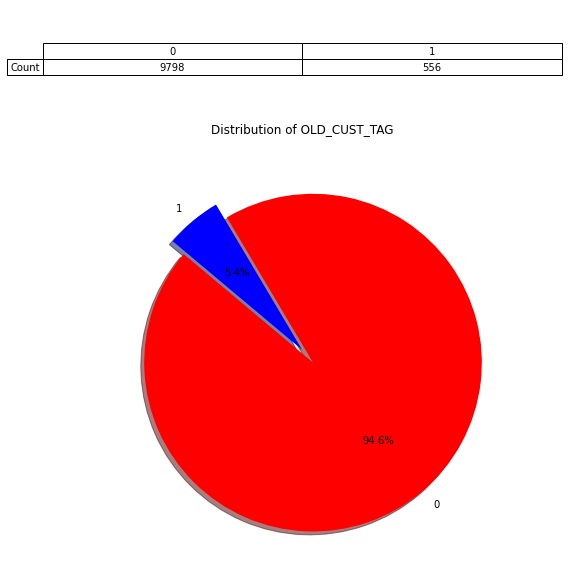

In [40]:
def plot_pie_with_table(data, col):
    """
    Function to generate a pie chart for a categorical variable and
    display the counts in a table format above the pie chart.
    
    Args: 
      data: DataFrame
      col: column name to plot
      
    Returns: None
    """
    value_counts = data[col].value_counts()

    fig, axs = plt.subplots(2, 1, figsize=(8, 8), 
                            gridspec_kw={'height_ratios': [1, 4]})

    table_data = [value_counts.values]
    rows = ['Count']
    columns = value_counts.index.to_list()
    axs[0].axis('off')
    axs[0].table(cellText=table_data, rowLabels=rows, colLabels=columns, cellLoc = 'center', loc='center')
   
    colors = ['red', 'blue']  
    explode = (0.1, 0)  
    axs[1].pie(value_counts, labels=value_counts.index, colors=colors, explode=explode, 
               autopct='%1.1f%%', startangle=140, shadow=True)
    axs[1].set_title('Distribution of ' + col)
    
    plt.tight_layout()
    plt.show()

plot_pie_with_table(master_df, 'OLD_CUST_TAG')


In [41]:
master_df.OLD_CUST_TAG.value_counts()

0    9798
1     556
Name: OLD_CUST_TAG, dtype: int64

### Exploration on Customers' Age

In [42]:
income_df = master_df.groupby('AGE_GROUP').agg({'MEDIAN_MONTHLY_CREDIT_VALUE': 'mean',
                                                 'MEDIAN_MONTHLY_DEBIT_VALUE': 'mean',
                                                 'AVERAGE_MONTHLY_BALANCE': 'mean'}).reset_index()
income_df = income_df.sort_values(by = 'AVERAGE_MONTHLY_BALANCE', ascending=False)

In [43]:
income_df

,AGE_GROUP,MEDIAN_MONTHLY_CREDIT_VALUE,MEDIAN_MONTHLY_DEBIT_VALUE,AVERAGE_MONTHLY_BALANCE
1,Elderly,3136698.5981095675379038,2042840.12844800599850714,1632118.913587786257267
3,Senior,788213.9081005515763536,586072.05224033154081553,381957.58411526796408
2,Mid-aged,153565.999238203279674,92602.39732022091629915,58209.7369160768503207
0,Adult,108972.3680323430307908,71396.5258006896037841,37549.6506911293181474
4,Young Adult,38688.5294954734999919,30094.4012095913894882,11408.5523645763096283


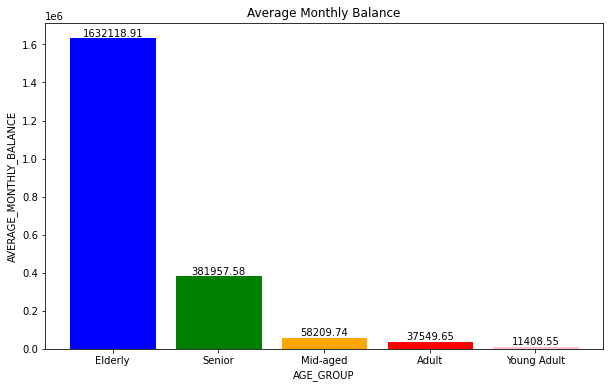

<Figure size 432x288 with 0 Axes>

In [44]:
plt.figure(figsize=(10,6))
barlist = plt.bar(x='AGE_GROUP',height='AVERAGE_MONTHLY_BALANCE',
                  data=income_df, color='blue')
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[2].set_color('orange')
barlist[3].set_color('cyan')
barlist[4].set_color('pink')
barlist[3].set_color('red')
plt.title('Average Monthly Balance')
for i, value in enumerate(income_df['AVERAGE_MONTHLY_BALANCE'].values):
    plt.text(i, value, str(round(value,2)), ha='center', va='bottom')
plt.xlabel('AGE_GROUP')
plt.ylabel('AVERAGE_MONTHLY_BALANCE')
plt.show()
plt.tight_layout()

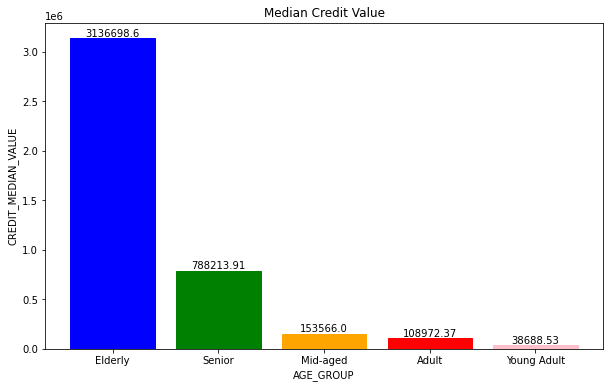

<Figure size 432x288 with 0 Axes>

In [45]:
plt.figure(figsize=(10,6))
income_df = income_df.sort_values(by = 'MEDIAN_MONTHLY_CREDIT_VALUE', ascending=False)
barlist = plt.bar(x='AGE_GROUP',height='MEDIAN_MONTHLY_CREDIT_VALUE',
                  data=income_df, color='blue')
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[2].set_color('orange')
barlist[3].set_color('cyan')
barlist[4].set_color('pink')
barlist[3].set_color('red')
plt.title('Median Credit Value')
for i, value in enumerate(income_df['MEDIAN_MONTHLY_CREDIT_VALUE'].values):
    plt.text(i, value, str(round(value,2)), ha='center', va='bottom')
plt.xlabel('AGE_GROUP')
plt.ylabel('CREDIT_MEDIAN_VALUE')
plt.show()
plt.tight_layout()

has_taken_internal_loan      0   1    All
AGE_GROUP                                
All                      10313  41  10354
Adult                     2793  14   2807
Mid-aged                  1964  14   1978
Senior                     981   8    989
Young Adult               4444   5   4449
Elderly                    131   0    131
------------------------------------------------------------------------------------------------------------------------


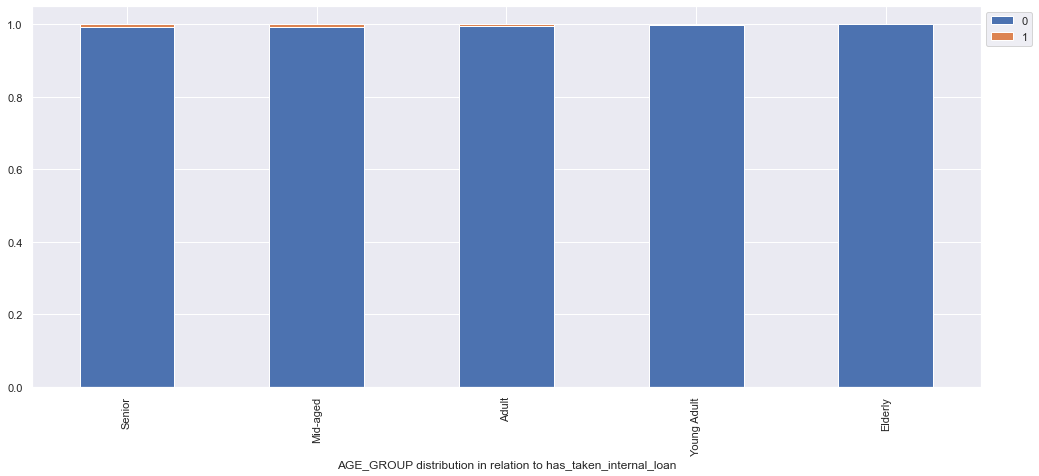

In [46]:
stacked_plot(x='AGE_GROUP',data=master_df,y='has_taken_internal_loan')

In [47]:
total_points_cat = master_df.groupby('AGE_GROUP').agg({
                                                  'TOTAL_POINTS_EARNED': 'mean'}).reset_index().sort_values(by='TOTAL_POINTS_EARNED',
                                                                                                           ascending=False)
total_points_cat.rename(columns = {'TOTAL_POINTS_EARNED':'AVG_TOTAL_POINTS_EARNED'},inplace=True)
total_points_cat

,AGE_GROUP,AVG_TOTAL_POINTS_EARNED
1,Elderly,122.3435114503816834
3,Senior,87.759352881698689
2,Mid-aged,62.27553083923154986
0,Adult,17.6736729604560026
4,Young Adult,4.8246797033041133


In [48]:
age_product = master_df.copy()
age_product = age_product[age_product['EARLIEST_PRODUCT'] != age_product['LATEST_PRODUCT']]
age_product_df = age_product.groupby('AGE_GROUP').agg({'EARLIEST_PRODUCT':lambda x: pd.Series.mode(x)[0],
                                                    'LATEST_PRODUCT': lambda x: pd.Series.mode(x)[0]}).reset_index()

In [49]:
age_product_df

,AGE_GROUP,EARLIEST_PRODUCT,LATEST_PRODUCT
0,Adult,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
1,Elderly,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
2,Mid-aged,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
3,Senior,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
4,Young Adult,PAYGO-LCY,PAYGO-LCY


In [50]:
master_df.groupby('AGE_GROUP').agg({'AGE':['mean','median']}).reset_index()

AGE_GROUP                 AGE       
                              mean median
0        Adult 30.5703598147488407   30.0
1      Elderly 71.5496183206106906   70.0
2     Mid-aged 38.8948432760363971   38.0
3       Senior 52.3882709807886755   51.0
4  Young Adult 23.6316026073274905   24.0

### Exploration on Card Usage

In [51]:
income_df = master_df.groupby('TOTAL_POINTS_CATEGORY').agg({'MEDIAN_MONTHLY_CREDIT_VALUE': 'mean',
                                                 'MEDIAN_MONTHLY_DEBIT_VALUE': 'mean',
                                                 'AVERAGE_MONTHLY_BALANCE': 'mean'}).reset_index()
income_df = income_df.sort_values(by = 'AVERAGE_MONTHLY_BALANCE', ascending=False)

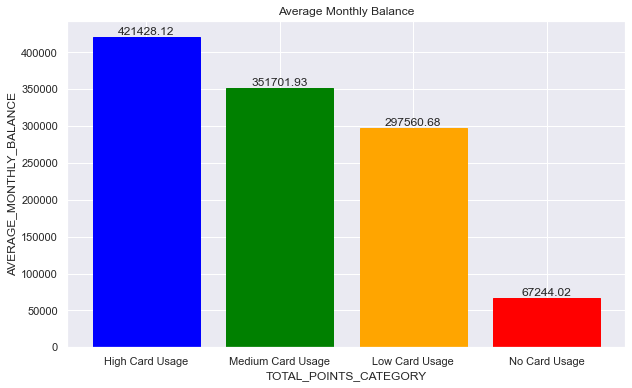

<Figure size 432x288 with 0 Axes>

In [52]:
plt.figure(figsize=(10,6))
barlist = plt.bar(x='TOTAL_POINTS_CATEGORY',height='AVERAGE_MONTHLY_BALANCE',
                  data=income_df, color='blue')
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[2].set_color('orange')
barlist[3].set_color('cyan')
barlist[3].set_color('red')
plt.title('Average Monthly Balance')
for i, value in enumerate(income_df['AVERAGE_MONTHLY_BALANCE'].values):
    plt.text(i, value, str(round(value,2)), ha='center', va='bottom')
plt.xlabel('TOTAL_POINTS_CATEGORY')
plt.ylabel('AVERAGE_MONTHLY_BALANCE')
plt.show()
plt.tight_layout()

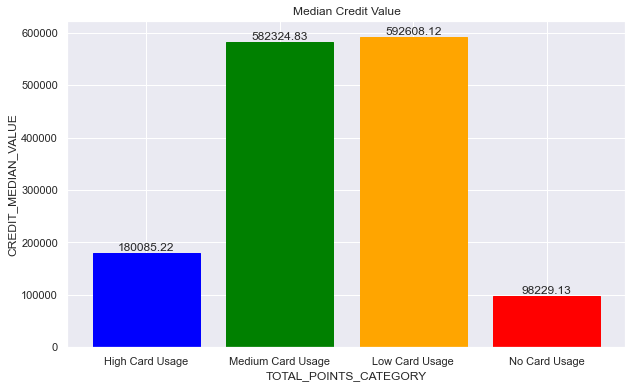

<Figure size 432x288 with 0 Axes>

In [53]:
plt.figure(figsize=(10,6))
barlist = plt.bar(x='TOTAL_POINTS_CATEGORY',height='MEDIAN_MONTHLY_DEBIT_VALUE',
                  data=income_df, color='blue')
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[2].set_color('orange')
barlist[3].set_color('cyan')
barlist[3].set_color('red')
plt.title('Median Credit Value')
for i, value in enumerate(income_df['MEDIAN_MONTHLY_DEBIT_VALUE'].values):
    plt.text(i, value, str(round(value,2)), ha='center', va='bottom')
plt.xlabel('TOTAL_POINTS_CATEGORY')
plt.ylabel('CREDIT_MEDIAN_VALUE')
plt.show()
plt.tight_layout()

In [54]:
age_product = master_df.copy()
age_product = age_product[age_product['EARLIEST_PRODUCT'] != age_product['LATEST_PRODUCT']]
age_product_df = age_product.groupby('TOTAL_POINTS_CATEGORY').agg({'EARLIEST_PRODUCT':lambda x: pd.Series.mode(x)[0],
                                                    'LATEST_PRODUCT': lambda x: pd.Series.mode(x)[0]}).reset_index()
age_product_df

,TOTAL_POINTS_CATEGORY,EARLIEST_PRODUCT,LATEST_PRODUCT
0,High Card Usage,CLUB-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
1,Low Card Usage,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
2,Medium Card Usage,CLUB-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
3,No Card Usage,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY


In [55]:
master_df.groupby('TOTAL_POINTS_CATEGORY').agg({'AGE':['mean','median']}).reset_index()

TOTAL_POINTS_CATEGORY                  AGE       
                                        mean median
0       High Card Usage  42.6666666666666643   43.0
1        Low Card Usage 34.48673946957878655   32.0
2     Medium Card Usage  42.8253968253968225   41.0
3         No Card Usage  31.5263812584223082   29.0

### Exploration on OTG_REVENUE_CATEGORY

In [56]:
income_df = master_df.groupby('OTG_REVENUE_CATEGORY').agg({'MEDIAN_MONTHLY_CREDIT_VALUE': 'mean',
                                                 'MEDIAN_MONTHLY_DEBIT_VALUE': 'mean',
                                                 'AVERAGE_MONTHLY_BALANCE': 'mean'}).reset_index()
income_df = income_df.sort_values(by = 'AVERAGE_MONTHLY_BALANCE', ascending=False)

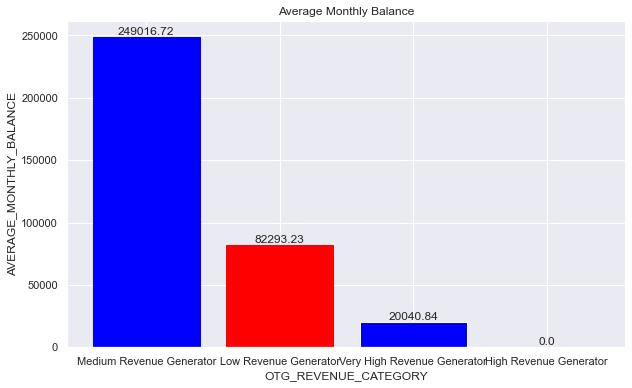

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(10,6))
barlist = plt.bar(x='OTG_REVENUE_CATEGORY',height='AVERAGE_MONTHLY_BALANCE',
                  data=income_df, color='blue')
barlist[0].set_color('blue')
barlist[1].set_color('green')
barlist[1].set_color('orange')
barlist[1].set_color('red')
plt.title('Average Monthly Balance')
for i, value in enumerate(income_df['AVERAGE_MONTHLY_BALANCE'].values):
    plt.text(i, value, str(round(value,2)), ha='center', va='bottom')
plt.xlabel('OTG_REVENUE_CATEGORY')
plt.ylabel('AVERAGE_MONTHLY_BALANCE')
plt.show()
plt.tight_layout()

has_taken_internal_loan          0   1    All
OTG_REVENUE_CATEGORY                         
All                          10313  41  10354
Low Revenue Generator        10248  37  10285
Medium Revenue Generator        62   4     66
High Revenue Generator           1   0      1
Very High Revenue Generator      2   0      2
------------------------------------------------------------------------------------------------------------------------


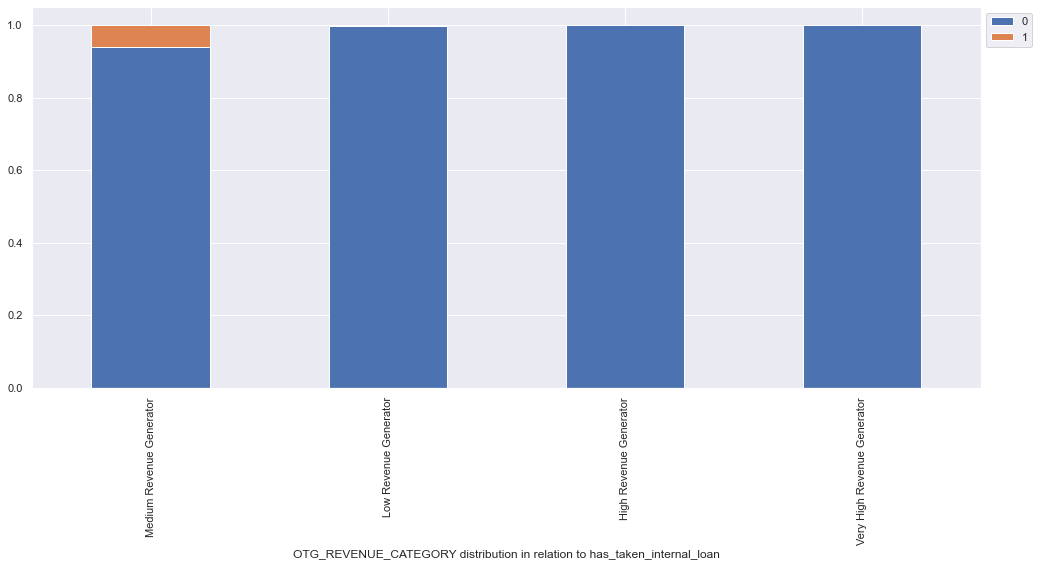

In [58]:
stacked_plot(x='OTG_REVENUE_CATEGORY',data=master_df,y='has_taken_internal_loan')

Credit_Card                      0    All
OTG_REVENUE_CATEGORY                     
All                          10354  10354
Low Revenue Generator        10285  10285
Medium Revenue Generator        66     66
Very High Revenue Generator      2      2
High Revenue Generator           1      1
------------------------------------------------------------------------------------------------------------------------


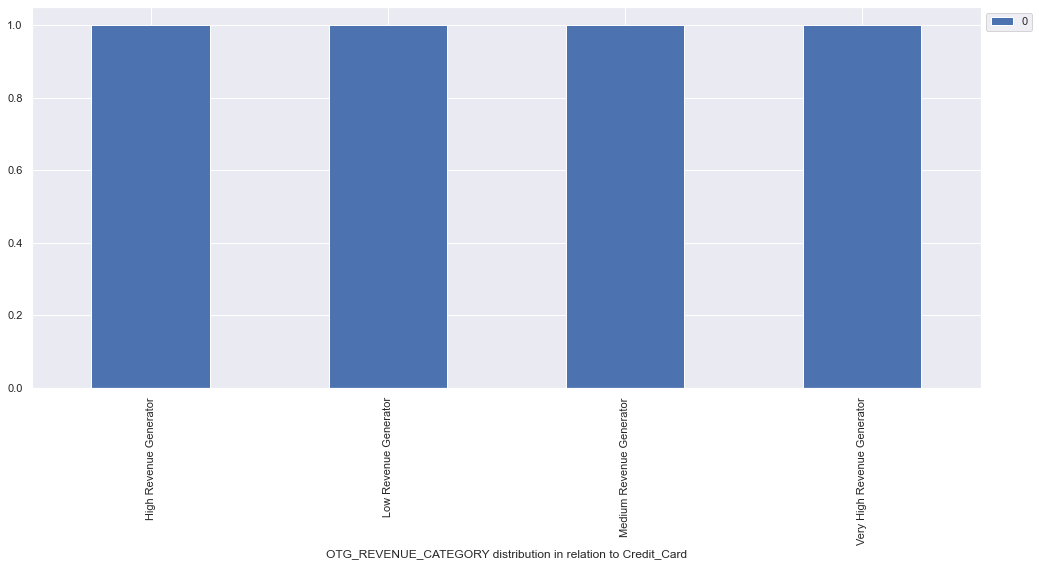

In [59]:
##Most do not have credit cards

def stacked_plot2(x, data, y):
    sns.set()

    tab1 = pd.crosstab(data[x], data[y], margins=True).sort_values(by='All', ascending=False)
    print(tab1)
    print('-'*120)

    tab = pd.crosstab(data[x], data[y], normalize='index')
 
    tab = tab.sort_values(by=tab.columns[0], ascending=False)
    
    tab.plot(kind='bar', stacked=True, figsize=(17,7))
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.xlabel(f"{x} distribution in relation to {y}")
    plt.show()

stacked_plot2(x='OTG_REVENUE_CATEGORY', data=master_df, y='Credit_Card')


In [60]:
# def stacked_plot3(x, data, y):
#     sns.set()

#     tab1 = pd.crosstab(data[x], data[y], margins=True).sort_values(by='All', ascending=False)
#     print(tab1)
#     print('-'*120)

#     tab = pd.crosstab(data[x], data[y], normalize='index')
 
#     tab = tab.sort_values(by=tab.columns[0], ascending=False)
    
#     tab.plot(kind='bar', stacked=True, figsize=(17,7))
#     plt.legend(loc="upper left", bbox_to_anchor=(1,1))
#     plt.xlabel(f"{x} distribution in relation to {y}")
#     plt.show()

# stacked_plot3(x='OTG_REVENUE_CATEGORY', data=master_df, y='Debit_Card')


In [61]:
age_product = master_df.copy()
age_product = age_product[age_product['EARLIEST_PRODUCT'] != age_product['LATEST_PRODUCT']]
age_product_df = age_product.groupby('OTG_REVENUE_CATEGORY').agg({'EARLIEST_PRODUCT':lambda x: pd.Series.mode(x)[0],
                                                    'LATEST_PRODUCT': lambda x: pd.Series.mode(x)[0]}).reset_index()
age_product_df

,OTG_REVENUE_CATEGORY,EARLIEST_PRODUCT,LATEST_PRODUCT
0,High Revenue Generator,ALPHA - LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
1,Low Revenue Generator,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
2,Medium Revenue Generator,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
3,Very High Revenue Generator,PAYGO-LCY,PAYGO-LCY


In [62]:
master_df.groupby('OTG_REVENUE_CATEGORY').agg({'AGE':['mean','median']}).reset_index()

OTG_REVENUE_CATEGORY                 AGE       
                                              mean median
0       High Revenue Generator                68.0   68.0
1        Low Revenue Generator 31.7626640738940189   29.0
2     Medium Revenue Generator 33.8787878787878753   30.5
3  Very High Revenue Generator                42.0   42.0

### Exploration on OTG Transaction Activity 

In [63]:
master_df.sample()

,CIF_ID,CUST_NAME,MARITALSTATUS,CUSTOMERGENDER,CUSTOMERINCOME,SEGMENTNAME,CUSTOMERTYPE,DESC_NATIONALITY,ISRESIDENT,IS_DIASPORA_CUSTOMER,CUSTOMERSTATUS,POSTALCODE,ACCOUNTCURRENCY,COUNT_ACCOUNTS,AGE,YEARS_WITH_BANK,SEGMENTATION_CLASS,SOL_DESC,CUST_SECTOR_CODE,CUSTOMER_SECTOR,CUSTOMER_ID_AVAILABILITY,OLD_CUST_TAG,MEDIAN_MONTHLY_CREDIT_VALUE,MEDIAN_MONTHLY_CREDIT_VOLUME,MEDIAN_MONTHLY_DEBIT_VALUE,MEDIAN_MONTHLY_DEBIT_VOLUME,TOTAL_POINTS_EARNED,AVERAGE_MONTHLY_BALANCE,EARLIEST_PRODUCT,LATEST_PRODUCT,MAXDISBURSEDAMOUNT_ASSETFINANCE,MINDISBURSEDAMOUNT_ASSETFINANCE,AVGDISBURSEDAMOUNT_ASSETFINANCE,MAXDISBURSEDAMOUNT_HIREPURCHASE,MINDISBURSEDAMOUNT_HIREPURCHASE,AVGDISBURSEDAMOUNT_HIREPURCHASE,MAXDISBURSEDAMOUNT_BONDLEVERAGE,MINDISBURSEDAMOUNT_BONDLEVERAGE,AVGDISBURSEDAMOUNT_BONDLEVERAGE,MAXDISBURSEDAMOUNT_TERMLOAN,MINDISBURSEDAMOUNT_TERMLOAN,AVGDISBURSEDAMOUNT_TERMLOAN,MAXDISBURSEDAMOUNT_STAFFLOANS,MINDISBURSEDAMOUNT_STAFFLOANS,AVGDISBURSEDAMOUNT_STAFFLOANS,MAXDISBURSEDAMOUNT_IPF,MINDISBURSEDAMOUNT_IPF,AVGDISBURSEDAMOUNT_IPF,MAXDISBURSEDAMOUNT_HOUSING,MINDISBURSEDAMOUNT_HOUSING,AVGDISBURSEDAMOUNT_HOUSING,MAXDISBURSEDAMOUNT_PERSONALLOANS,MINDISBURSEDAMOUNT_PERSONALLOANS,AVGDISBURSEDAMOUNT_PERSONALLOANS,MAXDISBURSEDAMOUNT_SHORTTERMLOANS,MINDISBURSEDAMOUNT_SHORTTERMLOANS,AVGDISBURSEDAMOUNT_SHORTTERMLOANS,MAXDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MINDISBURSEDAMOUNT_CONSTRUCTIONLOAN,AVGDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MAXDISBURSEDAMOUNT_STOCKFINANCELOAN,MINDISBURSEDAMOUNT_STOCKFINANCELOAN,AVGDISBURSEDAMOUNT_STOCKFINANCELOAN,NUM_TRX,AVG_TRAN_AMOUNT,MAX_AMOUNT_KES,MIN_AMOUNT_KES,AVG_REVENUE,TOTAL_REVENUE,CARD_CATEGORY_CODES,CARD_CATEGORIES,Credit_Card,Debit_Card,Prepaid_Card,CUSTOMERINCOME_CATEGORY,AGE_GROUP,YEARS_WITH_BANK_CATEGORY,TOTAL_POINTS_CATEGORY,has_taken_internal_loan,OTG_REVENUE_CATEGORY,OTG_TRANS_CATEGORY
8168,0421141,BEN MARITA SIRO,MARRIED,M,0.0,PERSONAL BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,00508,0,1,34,0,BL03,WILSON AIRPORT,OAS,ANY OTHER ACTIVITIES,1,0,33750.0,1.5,33250.0,9.0,0.0,27200.0,PAYGO-LCY,PAYGO-LCY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,3935.29411764705855603,20000.0,900.0,8.2941176470588225,141.0,DEBIT,DEBIT,0,0,0,LOW,Adult,Relatively New,No Card Usage,0,Low Revenue Generator,Low OTG Transactions


In [64]:
income_df = master_df.groupby('OTG_TRANS_CATEGORY').agg({'MEDIAN_MONTHLY_CREDIT_VALUE': 'mean',
                                                 'MEDIAN_MONTHLY_DEBIT_VALUE': 'mean',
                                                 'AVERAGE_MONTHLY_BALANCE': 'mean'}).reset_index()
income_df = income_df.sort_values(by = 'AVERAGE_MONTHLY_BALANCE', ascending=False)

In [65]:
master_df.groupby('AGE_GROUP').agg({'EARLIEST_PRODUCT':lambda x: pd.Series.mode(x)[0],
                                    'LATEST_PRODUCT': lambda x: pd.Series.mode(x)[0],
                                   'OTG_REVENUE_CATEGORY': lambda x: pd.Series.mode(x)[0],
                                   'TOTAL_POINTS_CATEGORY': lambda x: pd.Series.mode(x)[0],
                                   'YEARS_WITH_BANK_CATEGORY': lambda x: pd.Series.mode(x)[0],
                                   'OTG_TRANS_CATEGORY': lambda x: pd.Series.mode(x)[0],
                                   'AGE': 'mean',
                                   'YEARS_WITH_BANK': 'mean',
                                   'AVERAGE_MONTHLY_BALANCE': 'mean'}).reset_index()

,AGE_GROUP,EARLIEST_PRODUCT,LATEST_PRODUCT,OTG_REVENUE_CATEGORY,TOTAL_POINTS_CATEGORY,YEARS_WITH_BANK_CATEGORY,OTG_TRANS_CATEGORY,AGE,YEARS_WITH_BANK,AVERAGE_MONTHLY_BALANCE
0,Adult,PAYGO-LCY,PAYGO-LCY,Low Revenue Generator,No Card Usage,Relatively New,No OTG Transactions,30.5703598147488407,0.27324545778411113,37549.6506911293181474
1,Elderly,PAYGO-LCY,PAYGO-LCY,Low Revenue Generator,No Card Usage,Relatively New,No OTG Transactions,71.5496183206106906,3.2900763358778624,1632118.913587786257267
2,Mid-aged,PAYGO-LCY,PAYGO-LCY,Low Revenue Generator,No Card Usage,Relatively New,No OTG Transactions,38.8948432760363971,0.557633973710819,58209.7369160768503207
3,Senior,PAYGO-LCY,PAYGO-LCY,Low Revenue Generator,No Card Usage,Relatively New,No OTG Transactions,52.3882709807886755,1.07077856420626905,381957.58411526796408
4,Young Adult,PAYGO-LCY,PAYGO-LCY,Low Revenue Generator,No Card Usage,Relatively New,No OTG Transactions,23.6316026073274905,0.19330186558777254,11408.5523645763096283


In [66]:
age_product_df

,OTG_REVENUE_CATEGORY,EARLIEST_PRODUCT,LATEST_PRODUCT
0,High Revenue Generator,ALPHA - LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
1,Low Revenue Generator,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
2,Medium Revenue Generator,PAYGO-LCY,SAPPHIRE FOREIGN CURRENCY ACCOUNT- FCY
3,Very High Revenue Generator,PAYGO-LCY,PAYGO-LCY


In [67]:
master_df.columns

Index(['CIF_ID', 'CUST_NAME', 'MARITALSTATUS', 'CUSTOMERGENDER',
       'CUSTOMERINCOME', 'SEGMENTNAME', 'CUSTOMERTYPE', 'DESC_NATIONALITY',
       'ISRESIDENT', 'IS_DIASPORA_CUSTOMER', 'CUSTOMERSTATUS', 'POSTALCODE',
       'ACCOUNTCURRENCY', 'COUNT_ACCOUNTS', 'AGE', 'YEARS_WITH_BANK',
       'SEGMENTATION_CLASS', 'SOL_DESC', 'CUST_SECTOR_CODE', 'CUSTOMER_SECTOR',
       'CUSTOMER_ID_AVAILABILITY', 'OLD_CUST_TAG',
       'MEDIAN_MONTHLY_CREDIT_VALUE', 'MEDIAN_MONTHLY_CREDIT_VOLUME',
       'MEDIAN_MONTHLY_DEBIT_VALUE', 'MEDIAN_MONTHLY_DEBIT_VOLUME',
       'TOTAL_POINTS_EARNED', 'AVERAGE_MONTHLY_BALANCE', 'EARLIEST_PRODUCT',
       'LATEST_PRODUCT', 'MAXDISBURSEDAMOUNT_ASSETFINANCE',
       'MINDISBURSEDAMOUNT_ASSETFINANCE', 'AVGDISBURSEDAMOUNT_ASSETFINANCE',
       'MAXDISBURSEDAMOUNT_HIREPURCHASE', 'MINDISBURSEDAMOUNT_HIREPURCHASE',
       'AVGDISBURSEDAMOUNT_HIREPURCHASE', 'MAXDISBURSEDAMOUNT_BONDLEVERAGE',
       'MINDISBURSEDAMOUNT_BONDLEVERAGE', 'AVGDISBURSEDAMOUNT_BONDLEVERAGE'

In [68]:
master_df.sample()

,CIF_ID,CUST_NAME,MARITALSTATUS,CUSTOMERGENDER,CUSTOMERINCOME,SEGMENTNAME,CUSTOMERTYPE,DESC_NATIONALITY,ISRESIDENT,IS_DIASPORA_CUSTOMER,CUSTOMERSTATUS,POSTALCODE,ACCOUNTCURRENCY,COUNT_ACCOUNTS,AGE,YEARS_WITH_BANK,SEGMENTATION_CLASS,SOL_DESC,CUST_SECTOR_CODE,CUSTOMER_SECTOR,CUSTOMER_ID_AVAILABILITY,OLD_CUST_TAG,MEDIAN_MONTHLY_CREDIT_VALUE,MEDIAN_MONTHLY_CREDIT_VOLUME,MEDIAN_MONTHLY_DEBIT_VALUE,MEDIAN_MONTHLY_DEBIT_VOLUME,TOTAL_POINTS_EARNED,AVERAGE_MONTHLY_BALANCE,EARLIEST_PRODUCT,LATEST_PRODUCT,MAXDISBURSEDAMOUNT_ASSETFINANCE,MINDISBURSEDAMOUNT_ASSETFINANCE,AVGDISBURSEDAMOUNT_ASSETFINANCE,MAXDISBURSEDAMOUNT_HIREPURCHASE,MINDISBURSEDAMOUNT_HIREPURCHASE,AVGDISBURSEDAMOUNT_HIREPURCHASE,MAXDISBURSEDAMOUNT_BONDLEVERAGE,MINDISBURSEDAMOUNT_BONDLEVERAGE,AVGDISBURSEDAMOUNT_BONDLEVERAGE,MAXDISBURSEDAMOUNT_TERMLOAN,MINDISBURSEDAMOUNT_TERMLOAN,AVGDISBURSEDAMOUNT_TERMLOAN,MAXDISBURSEDAMOUNT_STAFFLOANS,MINDISBURSEDAMOUNT_STAFFLOANS,AVGDISBURSEDAMOUNT_STAFFLOANS,MAXDISBURSEDAMOUNT_IPF,MINDISBURSEDAMOUNT_IPF,AVGDISBURSEDAMOUNT_IPF,MAXDISBURSEDAMOUNT_HOUSING,MINDISBURSEDAMOUNT_HOUSING,AVGDISBURSEDAMOUNT_HOUSING,MAXDISBURSEDAMOUNT_PERSONALLOANS,MINDISBURSEDAMOUNT_PERSONALLOANS,AVGDISBURSEDAMOUNT_PERSONALLOANS,MAXDISBURSEDAMOUNT_SHORTTERMLOANS,MINDISBURSEDAMOUNT_SHORTTERMLOANS,AVGDISBURSEDAMOUNT_SHORTTERMLOANS,MAXDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MINDISBURSEDAMOUNT_CONSTRUCTIONLOAN,AVGDISBURSEDAMOUNT_CONSTRUCTIONLOAN,MAXDISBURSEDAMOUNT_STOCKFINANCELOAN,MINDISBURSEDAMOUNT_STOCKFINANCELOAN,AVGDISBURSEDAMOUNT_STOCKFINANCELOAN,NUM_TRX,AVG_TRAN_AMOUNT,MAX_AMOUNT_KES,MIN_AMOUNT_KES,AVG_REVENUE,TOTAL_REVENUE,CARD_CATEGORY_CODES,CARD_CATEGORIES,Credit_Card,Debit_Card,Prepaid_Card,CUSTOMERINCOME_CATEGORY,AGE_GROUP,YEARS_WITH_BANK_CATEGORY,TOTAL_POINTS_CATEGORY,has_taken_internal_loan,OTG_REVENUE_CATEGORY,OTG_TRANS_CATEGORY
226,0420859,ALICE WANGUI KIHENJO,SINGLE,F,250000.0,PERSONAL BANKING,RETAIL,KENYA,RESIDENT,,ACTIVE,80100,0,1,37,0,BL03,NYERERE AVENUE MOMBASA,OAS,ANY OTHER ACTIVITIES,1,0,112050.0,2.5,190200.0,8.0,0.0,85050.0,PAYGO-LCY,PAYGO-LCY,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,55033.3333333333284827,150100.0,4000.0,8.33333333333333215,25.0,DEBIT,DEBIT,0,0,0,LOW,Mid-aged,Relatively New,No Card Usage,0,Low Revenue Generator,Low OTG Transactions


In [69]:
df_request = master_df[['CIF_ID', 'YEARS_WITH_BANK_CATEGORY']]


In [70]:
df_request.shape

(10354, 2)

In [71]:
df_request.YEARS_WITH_BANK_CATEGORY.unique()

array(['Loyalists', 'Sticky Customers', 'Retained Customers',
       'Relatively New'], dtype=object)

In [72]:
df_request = df_request[df_request.YEARS_WITH_BANK_CATEGORY != 'Relatively New']


In [73]:
df_request.YEARS_WITH_BANK_CATEGORY.unique()

array(['Loyalists', 'Sticky Customers', 'Retained Customers'],
      dtype=object)